In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.utils.np_utils import to_categorical
from keras.constraints import maxnorm
from keras.optimizers import RMSprop, SGD
from keras.constraints import maxnorm

Using Theano backend.


# Barcode CNN classifier

In [3]:
data_set = np.loadtxt('dataset/bar_codes_50_100.csv', delimiter=',', dtype=np.uint8)

In [11]:
image_height = 50
image_width = 100
image_depth = 3

In [6]:
np.random.shuffle(data_set)
Y = data_set[:,:1].astype('uint8')
X = data_set[:,1:].reshape(data_set.shape[0],image_depth,image_height,image_width)

In [7]:
trainset_num = int(len(X) * 0.7) # classical split 70/30

X_train = X[:trainset_num]
X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X[trainset_num:]
X_test = X_test.astype('float32')
X_test = X_test/255

In [8]:
classes_num = 2

Y_train = Y[:trainset_num]
Y_train = to_categorical(Y_train, classes_num)

Y_test = Y[trainset_num:]
Y_test = to_categorical(Y_test, classes_num)

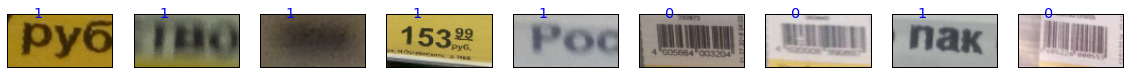

In [9]:
images_n_to_display = 9
sample_images = X_train[:images_n_to_display].reshape((images_n_to_display,image_height,image_width,image_depth))

fig, axes = plt.subplots(ncols=images_n_to_display)
fig.set_figwidth(20)

for i in range(images_n_to_display):
    axes[i].imshow(sample_images[i], cmap=plt.cm.bwr)
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].text(24,3,np.argmax(Y_train[i]), color='blue', size='x-large')

In [12]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(image_depth, image_height, image_width), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, validation_split=0.2, batch_size=32, nb_epoch=epochs)

Train on 2325 samples, validate on 582 samples
Epoch 1/25
2325/2325 [==============================] - 106s - loss: 0.4498 - acc: 0.8288 - val_loss: 0.3532 - val_acc: 0.8540
Epoch 2/25
2325/2325 [==============================] - 118s - loss: 0.3834 - acc: 0.8383 - val_loss: 0.3715 - val_acc: 0.8540
Epoch 3/25
2325/2325 [==============================] - 119s - loss: 0.3476 - acc: 0.8413 - val_loss: 0.2758 - val_acc: 0.8574
Epoch 4/25
2325/2325 [==============================] - 115s - loss: 0.3043 - acc: 0.8770 - val_loss: 0.2012 - val_acc: 0.9570
Epoch 5/25
2325/2325 [==============================] - 120s - loss: 0.1951 - acc: 0.9316 - val_loss: 0.1329 - val_acc: 0.9588
Epoch 6/25
2325/2325 [==============================] - 121s - loss: 0.1857 - acc: 0.9363 - val_loss: 0.1190 - val_acc: 0.9656
Epoch 7/25
2325/2325 [==============================] - 123s - loss: 0.1495 - acc: 0.9492 - val_loss: 0.1223 - val_acc: 0.9622
Epoch 8/25
2325/2325 [==============================] - 119s - l